In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob 

In [2]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
glob.glob(r'C:\Users\krish\Downloads\S&P_resources\individual_stocks_5yr\*csv')

['C:\\Users\\krish\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\krish\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\krish\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\krish\\Downloads\\S&P_resources\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\krish\\Downloads\\S&P_resources\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\krish\\Downloads\\S&P_resources\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\krish\\Downloads\\S&P_resources\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\krish\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\krish\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADI_data.csv',
 'C:\\Users\\krish\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADM_data.csv',
 'C:\\Users\\krish\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADP_data.csv',
 'C:\\Users\\krish\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADSK

In [4]:
Company_list = [ r'C:\\Users\\krish\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
                 r'C:\\Users\\krish\\Downloads\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv',
                 r'C:\\Users\\krish\\Downloads\\S&P_resources\\individual_stocks_5yr\\GOOG_data.csv',
                 r'C:\\Users\\krish\\Downloads\\S&P_resources\\individual_stocks_5yr\\MSFT_data.csv']

In [5]:
All_Data = pd.DataFrame()
for file in Company_list :
    Current_df =pd.read_csv(file)
    All_Data = pd.concat([Current_df,All_Data], ignore_index =  True)

In [6]:
All_Data.shape

(4752, 7)

In [7]:
All_Data['Name'].unique()

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

In [8]:
All_Data.head()

date   open   high    low  close    volume  Name
0  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT

In [9]:
All_Data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

                                                    Analysing Change in StockPrice Over time

In [10]:
All_Data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [11]:
All_Data['date'] = pd.to_datetime(All_Data['date'])

In [12]:
tech_list = All_Data['Name'].unique()

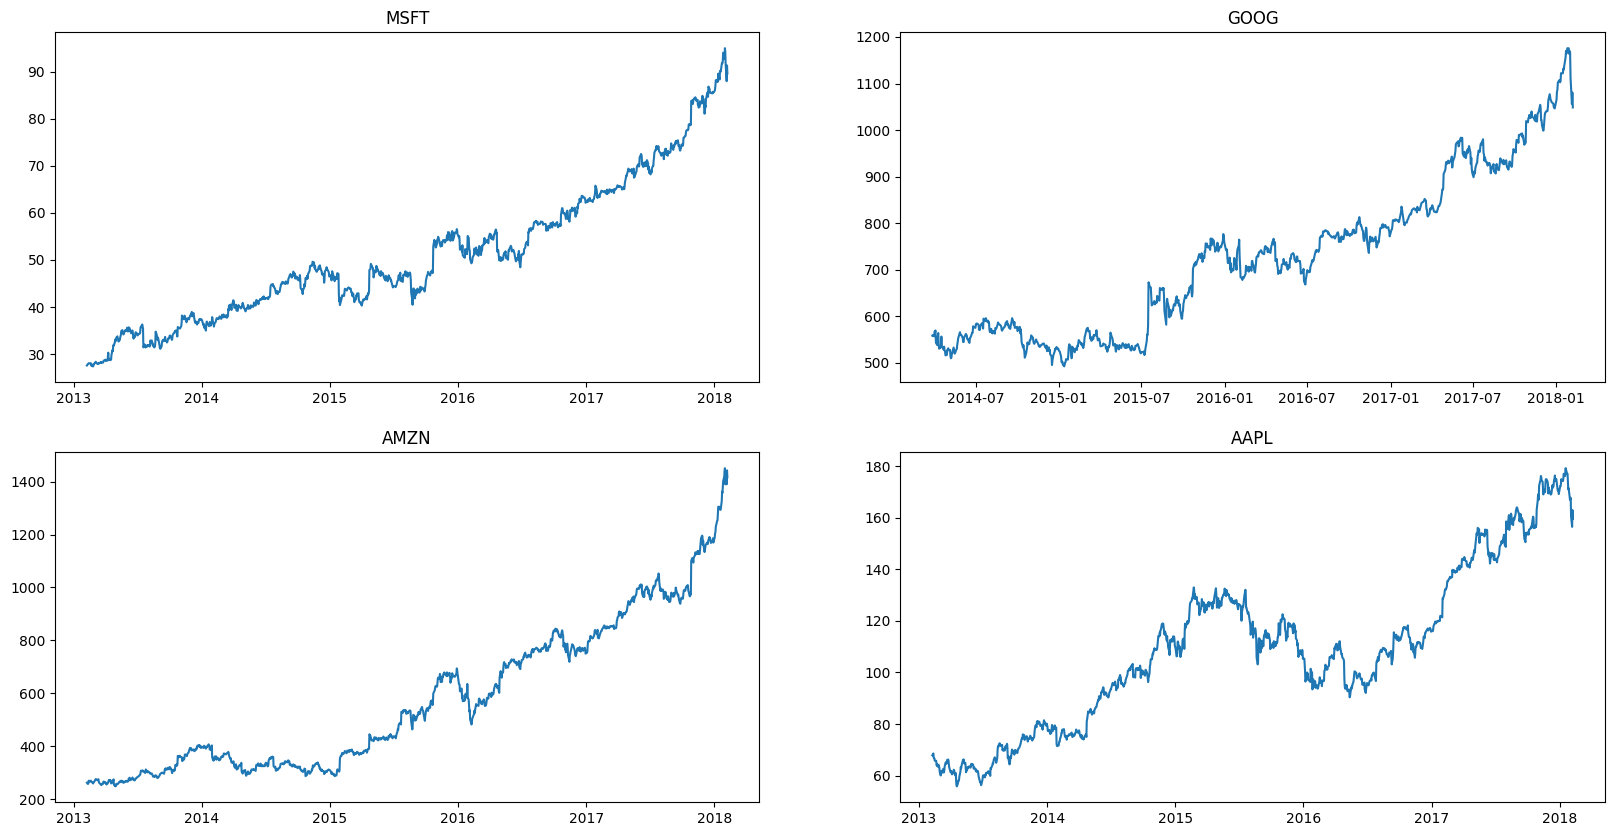

In [13]:
plt.figure(figsize=(20,10))
for index, company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1= All_Data['Name']==company
    df = All_Data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)

                                                Analysing Moving Average of various stocks

In [14]:
All_Data['close'].rolling(window=10).mean().head(14)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
Name: close, dtype: float64

In [15]:
new_data = All_Data.copy()

In [16]:
ma_day = [10,20,50]

for ma in ma_day:
    new_data['close'+str(ma)] = new_data['close'].rolling(ma).mean()


In [17]:
new_data.tail()

date     open    high       low   close    volume  Name  close10  \
4747 2018-02-01  167.165  168.62  166.7600  167.78  47230787  AAPL  171.948   
4748 2018-02-02  166.000  166.80  160.1000  160.50  86593825  AAPL  170.152   
4749 2018-02-05  159.100  163.88  156.0000  156.49  72738522  AAPL  168.101   
4750 2018-02-06  154.830  163.72  154.0000  163.03  68243838  AAPL  166.700   
4751 2018-02-07  163.085  163.40  159.0685  159.54  51608580  AAPL  165.232   

       close20   close50  
4747  173.8700  172.8252  
4748  173.2435  172.6356  
4749  172.3180  172.3026  
4750  171.7520  172.0640  
4751  171.0125  171.7554

In [18]:
new_data.set_index('date', inplace = True)

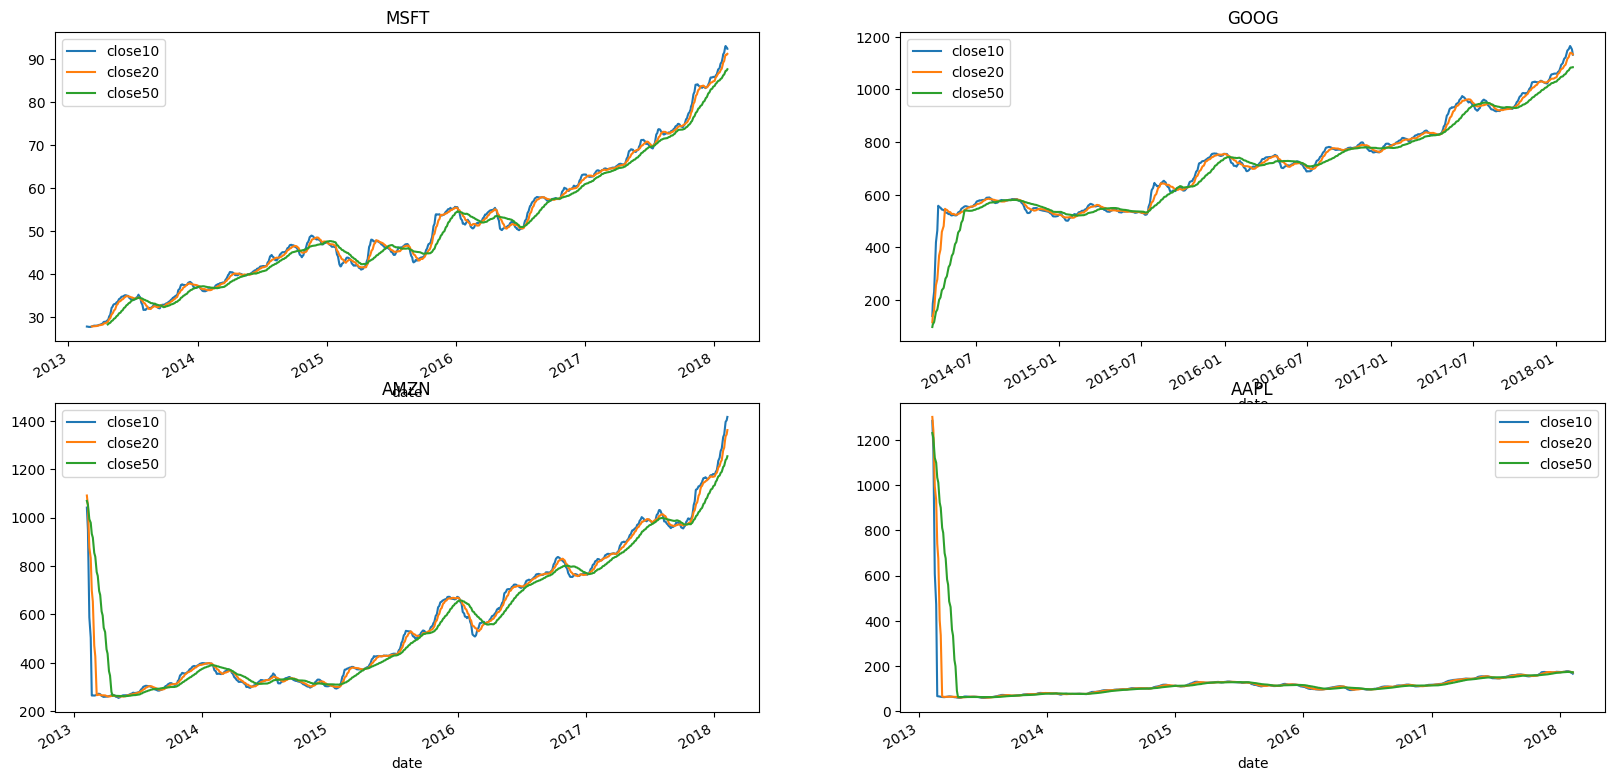

In [19]:
plt.figure(figsize=(20,10))
for index, company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1= new_data['Name']==company
    df = new_data[filter1]
    df[['close10','close20','close50']].plot(ax=plt.gca())
    plt.title(company)

                                            Change in Closing Price of Microsoft Stock

In [20]:
Company_list


['C:\\\\Users\\\\krish\\\\Downloads\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\krish\\\\Downloads\\\\S&P_resources\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\krish\\\\Downloads\\\\S&P_resources\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\krish\\\\Downloads\\\\S&P_resources\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [21]:
MSFT = pd.read_csv(r'C:\\\\Users\\\\krish\\\\Downloads\\\\S&P_resources\\\\individual_stocks_5yr\\\\MSFT_data.csv')

In [22]:
MSFT['Daily return(in %)'] = MSFT['close'].pct_change() * 100

In [23]:
MSFT.head()

date   open   high    low  close    volume  Name  Daily return(in %)
0  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT                 NaN
1  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT            1.125227
2  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT            0.071788
3  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT            0.538020
4  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT            0.035676

In [24]:
import plotly.express as px

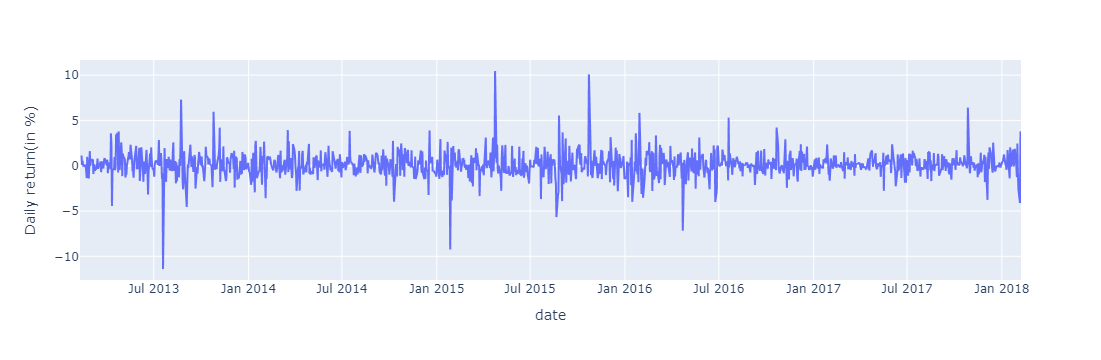

In [25]:
px.line(MSFT, x = 'date', y= 'Daily return(in %)')

                                                            Resampling Analysis

In [26]:
MSFT.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return(in %)    float64
dtype: object

In [27]:
MSFT['date'] = pd.to_datetime(MSFT['date'])

In [28]:
MSFT.set_index('date', inplace = True)

In [29]:
MSFT.head()

open   high    low  close    volume  Name  Daily return(in %)
date                                                                      
2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT                 NaN
2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT            1.125227
2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT            0.071788
2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT            0.538020
2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT            0.035676

<Axes: xlabel='date'>

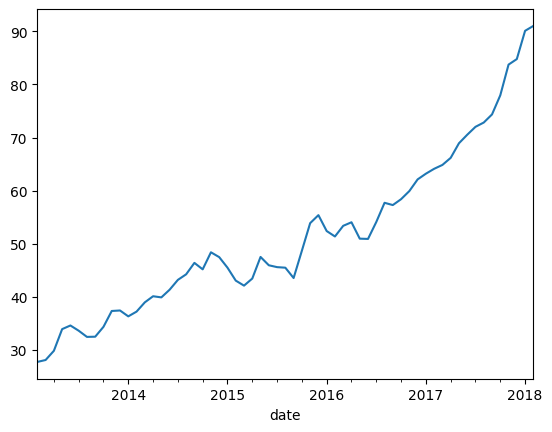

In [30]:
MSFT['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

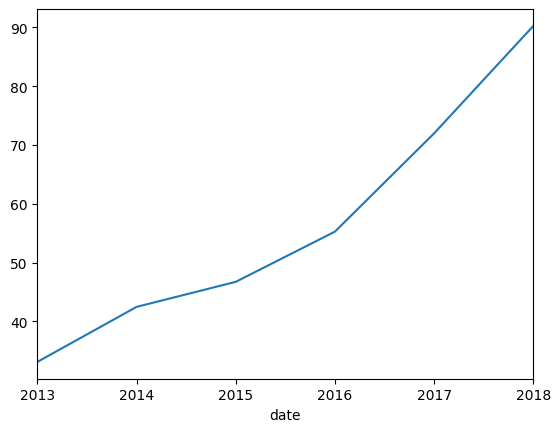

In [31]:
MSFT['close'].resample('Y').mean().plot()

<Axes: xlabel='date'>

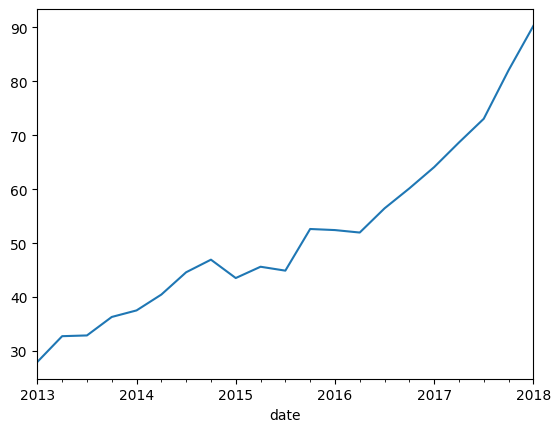

In [32]:
MSFT['close'].resample('Q').mean().plot()

                                                Correlation between companies closing stock Price

In [33]:
Company_list

['C:\\\\Users\\\\krish\\\\Downloads\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\krish\\\\Downloads\\\\S&P_resources\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\krish\\\\Downloads\\\\S&P_resources\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\krish\\\\Downloads\\\\S&P_resources\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [34]:
AAPL = pd.read_csv(Company_list[0])
AMZN = pd.read_csv(Company_list[1])
GOOG = pd.read_csv(Company_list[2])
MSFT = pd.read_csv(Company_list[3])

In [35]:
closing_price = pd.DataFrame()

In [36]:
closing_price['AAPL_close'] = AAPL['close']
closing_price['AMZN_close'] = AMZN['close']
closing_price['GOOG_close'] = GOOG['close']
closing_price['MSFT_close'] = MSFT['close']

In [37]:
closing_price

AAPL_close  AMZN_close  GOOG_close  MSFT_close
0        67.8542      261.95      558.46       27.55
1        68.5614      257.21      559.99       27.86
2        66.8428      258.70      556.97       27.88
3        66.7156      269.47      567.16       28.03
4        66.6556      269.24      567.00       28.04
...          ...         ...         ...         ...
1254    167.7800     1390.00         NaN       94.26
1255    160.5000     1429.95         NaN       91.78
1256    156.4900     1390.00         NaN       88.00
1257    163.0300     1442.84         NaN       91.33
1258    159.5400     1416.78         NaN       89.61

[1259 rows x 4 columns]

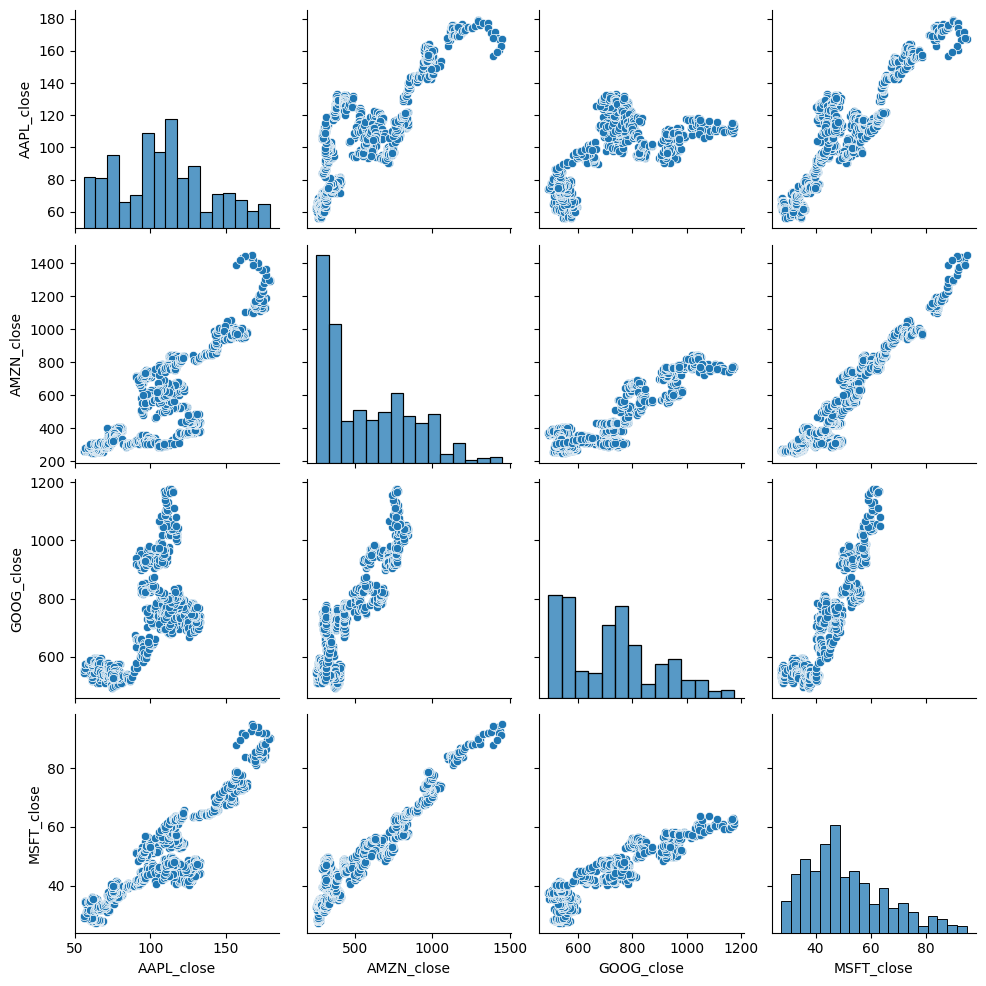

In [39]:
sns.pairplot(closing_price)

<Axes: >

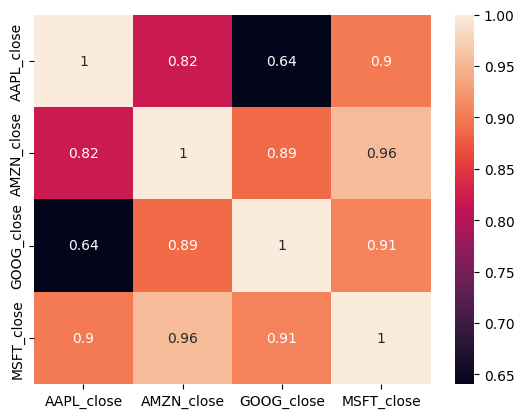

In [41]:
sns.heatmap(closing_price.corr(),annot = True)

In [43]:
closing_price['MSFT_close'] - closing_price['MSFT_close'].shift(1)/closing_price['MSFT_close'].shift(1)

0         NaN
1       26.86
2       26.88
3       27.03
4       27.04
        ...  
1254    93.26
1255    90.78
1256    87.00
1257    90.33
1258    88.61
Name: MSFT_close, Length: 1259, dtype: float64

In [45]:
closing_price.columns

Index(['AAPL_close', 'AMZN_close', 'GOOG_close', 'MSFT_close'], dtype='object')

In [48]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) * 100

In [49]:
closing_price.columns

Index(['AAPL_close', 'AMZN_close', 'GOOG_close', 'MSFT_close',
       'AAPL_close_pct_change', 'AMZN_close_pct_change',
       'GOOG_close_pct_change', 'MSFT_close_pct_change'],
      dtype='object')

In [50]:
CLOSING_PCT_CHANGE =  closing_price[['AAPL_close_pct_change', 'AMZN_close_pct_change',
       'GOOG_close_pct_change', 'MSFT_close_pct_change']]

In [51]:
CLOSING_PCT_CHANGE.head()

AAPL_close_pct_change  AMZN_close_pct_change  GOOG_close_pct_change  \
0                    NaN                    NaN                    NaN   
1               1.042235              -1.809506               0.273968   
2              -2.506658               0.579293              -0.539295   
3              -0.190297               4.163123               1.829542   
4              -0.089934              -0.085353              -0.028211   

   MSFT_close_pct_change  
0                    NaN  
1               1.125227  
2               0.071788  
3               0.538020  
4               0.035676

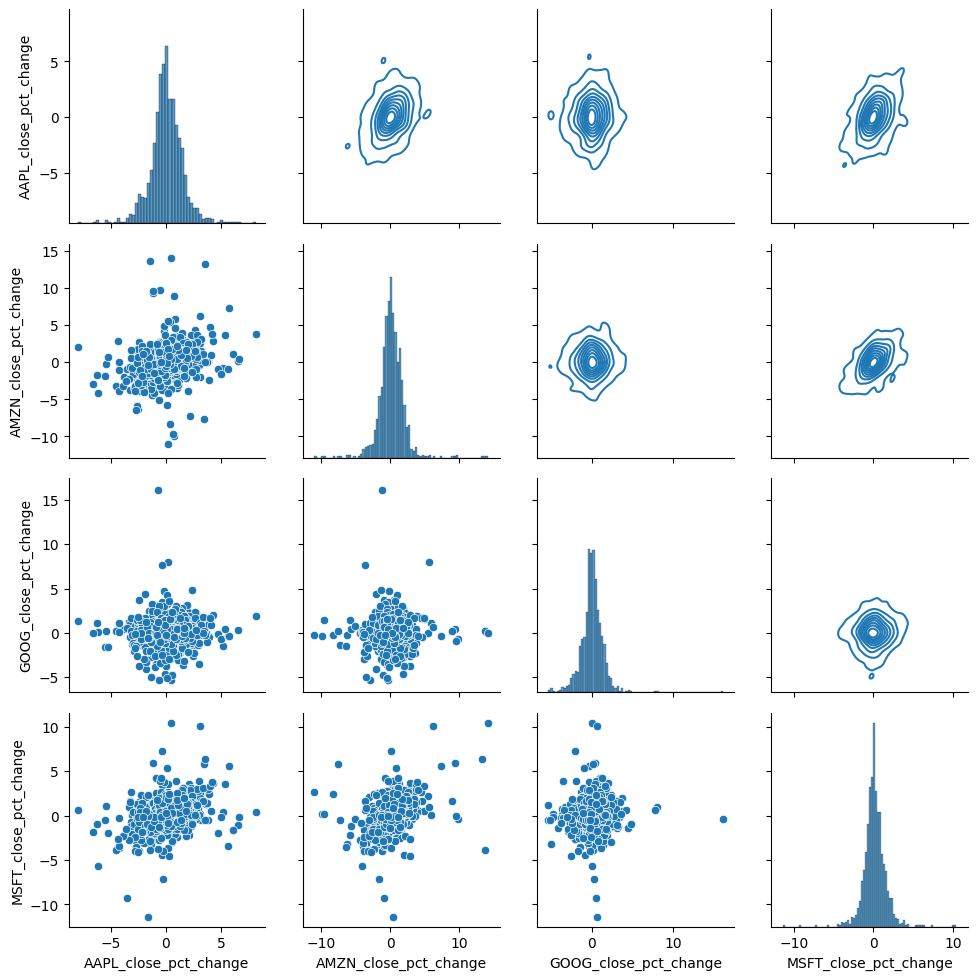

In [57]:
g = sns.PairGrid(data = CLOSING_PCT_CHANGE)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)